In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


In [3]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

In [20]:
score = []
m_cor = data_train.corr()
dict_l = {}
for idx_cor in [.6, .65, .7, .75, .8, .82, .84, .85, .87, .89, .9, .91, .95]:
    for i in m_cor.index:
        dict_l.update({i:m_cor[m_cor[i]>idx_cor].index})
    cols_drop = []
    for idx in dict_l:
        if not (idx in cols_drop): #si ya está para eliminar no se revisa
            for j in range(len(dict_l[idx])):
                if idx != dict_l[idx][j]: #el se quiere mantener
                    if not (dict_l[idx][j] in cols_drop): #si no se a eliminado se puede eliminar
                        cols_drop.append(dict_l[idx][j])

    df_train_drop = data_train
    for idx in np.unique(cols_drop):
        df_train_drop = df_train_drop.drop(idx,axis=1)
    
    clf = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
    y  = df_train_drop["GENRE"]
    X = df_train_drop.drop("GENRE",axis=1)
    score.append(np.mean(cross_val_score(clf, X,y, n_jobs=2)))

In [21]:
score

[0.9293317326930772,
 0.9295718287314926,
 0.9310124049619848,
 0.9310924369747898,
 0.9313325330132054,
 0.9326930772308923,
 0.9345338135254102,
 0.9341336534613845,
 0.9338935574229691,
 0.933813525410164,
 0.9344537815126049,
 0.9336534613845539,
 0.9346138455382152]

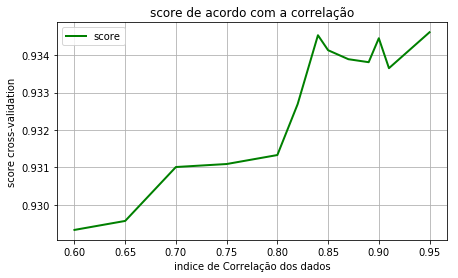

In [3]:
plt.figure(figsize=(7,4))
plt.title("score de acordo com a correlação")
plt.xlabel("indice de Correlação dos dados")
plt.ylabel("score cross-validation")
plt.grid()
plt.plot([.6, .65, .7, .75, .8, .82, .84, .85, .87, .89, .9, .91, .95], score, label="score", linewidth=2, color="green")
plt.legend();

In [5]:
sc = np.array([0.94453125, 0.940625  , 0.93119625, 0.92241379, 0.94196078,
       0.94509804, 0.94745098, 0.94980392, 0.95133438, 0.95918367])

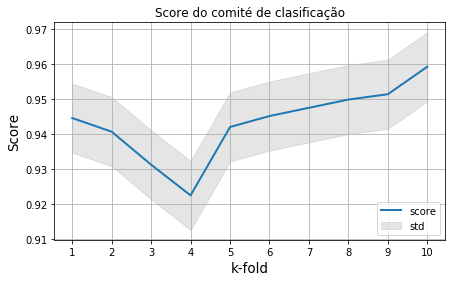

In [15]:
plt.figure(figsize=(7,4))
plt.grid()
plt.title("Score do comité de clasificação")
plt.ylabel("Score", fontsize=13.5)
plt.xlabel("k-fold", fontsize=13.5)
plt.xticks(range(1,11),range(1,11))
plt.plot(range(1,11), sc, label="score",linewidth=2)
#plt.plot(range(1,11), np.ones(10)*np.mean(sc), color="red", alpha=1, linestyle='--')
plt.fill_between(range(1,11), sc - np.std(sc), sc + np.std(sc),color='gray', alpha=0.2, label="std")
plt.legend(loc=4);